# Woche 7: Data Cleaning - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten Aspekte des Data Cleanings am Airbnb-Beispiel kennengelernt haben, wenden Sie dieses Wissen Schritt für Schritt auf Ihren eigenen Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus dem Airbnb-Notebook
- Das bereinigte Dataset speichern Sie am Ende ab

---
## 1. Daten einlesen und Bibliotheken importieren

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren Datensatz.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`
- Setzen Sie einen Zufallsseed für Reproduzierbarkeit
- Laden Sie Ihren CSV-Datensatz mit `pd.read_csv()`

In [1]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Zufallsseed setzen


# Datensatz einlesen
df = pd.read_csv('../data/raw/Sleep_health_and_lifestyle_dataset.csv')
df_cleaned = df.copy()

---
## 2. Ersten Überblick verschaffen

**Aufgabe:** Verschaffen Sie sich einen ersten Überblick über Ihren Datensatz.

**Was Sie prüfen sollten:**
- Wie viele Zeilen und Spalten hat der Datensatz?
- Welche Spalten gibt es und welche Datentypen haben sie?
- Wie sehen die ersten Zeilen aus?

In [2]:
# Dimensionen des Datensatzes
print(f"Geladen: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")

# Erste Zeilen anzeigen
df.head()

Geladen: 374 Zeilen, 13 Spalten


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Informationen zu Spalten und Datentypen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


---
## 3. Fehlende Werte identifizieren

**Aufgabe:** Untersuchen Sie Ihren Datensatz auf fehlende Werte.

**Was Sie tun sollten:**
- Zählen Sie fehlende Werte pro Spalte
- Berechnen Sie den Prozentsatz fehlender Werte
- Visualisieren Sie fehlende Werte (optional: Heatmap)

In [4]:
# Fehlende Werte zählen
missing = df_cleaned.isnull().sum()
missing_pct = (missing / len(df_cleaned)) * 100
missing_df = pd.DataFrame({
    'Spalte': missing.index,
    'Fehlend': missing.values,
    'Prozent': missing_pct.values
})
missing_df = missing_df[missing_df['Fehlend'] > 0]
missing_df
# Prozentsatz fehlender Werte berechnen


# Optional: Visualisierung mit Heatmap


,Spalte,Fehlend,Prozent
12,Sleep Disorder,219,58.55615


---
## 4. Fehlende Werte behandeln

**Aufgabe:** Entscheiden Sie für jede Spalte mit fehlenden Werten, wie Sie damit umgehen.

**Mögliche Strategien:**
- Zeilen löschen (bei wenigen fehlenden Werten)
- Spalten löschen (bei sehr vielen fehlenden Werten)
- Fehlende Werte imputieren:
  - Numerische Spalten: Median oder Mittelwert
  - Kategoriale Spalten: Modus oder neue Kategorie

**Dokumentieren Sie Ihre Entscheidungen!**

In [5]:
# Strategie 1: Zeilen mit fehlenden Werten löschen (falls anwendbar)
# df = df.dropna(subset=['spaltenname'])


# Strategie 2: Spalten mit zu vielen fehlenden Werten löschen
# df = df.drop(columns=['spaltenname'])


# Strategie 3: Numerische Werte imputieren
# df['spaltenname'] = df['spaltenname'].fillna(df['spaltenname'].median())


# Strategie 4: Kategoriale Werte imputieren
# df['spaltenname'] = df['spaltenname'].fillna('Unknown')
df_cleaned['Sleep Disorder'].unique()
df_cleaned['Sleep Disorder'] = df_cleaned['Sleep Disorder'].fillna('None') # Jede Person bei der keine Schlafstoerung diagnostiziert wurde wird als gesund behandelt


In [6]:
# Überprüfung: Sind alle fehlenden Werte behandelt?
df_cleaned.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

---
## 5. Duplikate identifizieren und entfernen

**Aufgabe:** Prüfen Sie, ob Ihr Datensatz doppelte Zeilen enthält.

**Was Sie tun sollten:**
- Zählen Sie die Anzahl doppelter Zeilen
- Entfernen Sie Duplikate (falls vorhanden)
- Überprüfen Sie die neue Anzahl der Zeilen

In [7]:
# Anzahl doppelter Zeilen
dups = df_cleaned.duplicated(subset=['Person ID']).sum()
print(f"Duplikate: {dups}")

# Duplikate entfernen


# Neue Dimensionen prüfen


Duplikate: 0


---
## 6. Datentypen überprüfen und anpassen

**Aufgabe:** Stellen Sie sicher, dass alle Spalten die richtigen Datentypen haben.

**Was Sie prüfen sollten:**
- Sind numerische Spalten als `int` oder `float` kodiert?
- Sind kategoriale Spalten als `object` oder `category` kodiert?
- Müssen Datentypen konvertiert werden?

In [8]:
# Datentypen anzeigen
df_cleaned.info()

# Datentypen konvertieren (falls nötig)
# df['spaltenname'] = df['spaltenname'].astype('int')
# df['spaltenname'] = df['spaltenname'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
numeric_features = df_cleaned.select_dtypes(include=[np.number])
numeric_features.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77,4200
1,2,28,6.2,6,60,8,75,10000
2,3,28,6.2,6,60,8,75,10000
3,4,28,5.9,4,30,8,85,3000
4,5,28,5.9,4,30,8,85,3000


In [10]:
categorical_features = df_cleaned.select_dtypes(include=[object])
categorical_features.head()

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,Male,Software Engineer,Overweight,126/83,None
1,Male,Doctor,Normal,125/80,None
2,Male,Doctor,Normal,125/80,None
3,Male,Sales Representative,Obese,140/90,Sleep Apnea
4,Male,Sales Representative,Obese,140/90,Sleep Apnea


In [11]:
def clean_sleep_disorder(disorder):
    if disorder == 'None':
        return 0
    else:
        return 1

df_cleaned['Sleep Disorder'] = df_cleaned['Sleep Disorder'].apply(clean_sleep_disorder)
df_cleaned['Sleep Disorder'].unique()

array([0, 1])

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [13]:
df_cleaned['Blood Pressure'].head()

0    126/83
1    125/80
2    125/80
3    140/90
4    140/90
Name: Blood Pressure, dtype: object

In [14]:
df_cleaned[['Systolic', 'Diastolic']] = df_cleaned['Blood Pressure'].str.split('/', expand=True)

df_cleaned['Systolic'] = df_cleaned['Systolic'].astype(float)
df_cleaned['Diastolic'] = df_cleaned['Diastolic'].astype(float)

df_cleaned = df_cleaned.drop(columns=['Blood Pressure', 'Person ID'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int64  
 11  Systolic                 374 non-null    float64
 12  Diastolic                374 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 38.1+ KB


In [15]:
numeric_features = df_cleaned.select_dtypes(include=[np.number])
numeric_features.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,27,6.1,6,42,6,77,4200,0,126.0,83.0
1,28,6.2,6,60,8,75,10000,0,125.0,80.0
2,28,6.2,6,60,8,75,10000,0,125.0,80.0
3,28,5.9,4,30,8,85,3000,1,140.0,90.0
4,28,5.9,4,30,8,85,3000,1,140.0,90.0


In [16]:
categorical_features = df_cleaned.select_dtypes(include=[object])
categorical_features.head()

,Gender,Occupation,BMI Category
0,Male,Software Engineer,Overweight
1,Male,Doctor,Normal
2,Male,Doctor,Normal
3,Male,Sales Representative,Obese
4,Male,Sales Representative,Obese


In [17]:
df_cleaned.shape

(374, 13)

---
## 7. Ausreißer identifizieren

**Aufgabe:** Identifizieren Sie Ausreißer in numerischen Spalten.

**Methoden:**
- Visualisierung mit Boxplots
- IQR-Methode (Interquartile Range)
- Statistische Analyse (describe)

**Wichtig:** Entscheiden Sie für jeden Ausreißer, ob er:
- Ein Fehler ist (→ entfernen oder korrigieren)
- Ein echter extremer Wert ist (→ behalten)

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64


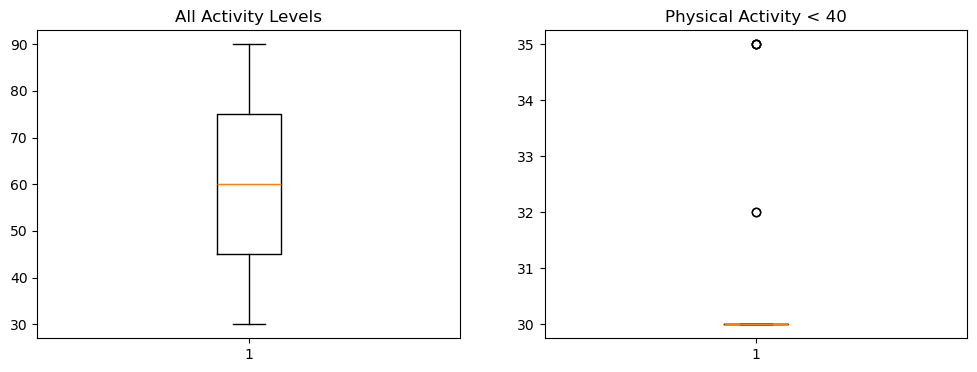

In [18]:
# Numerische Spalten auswählen
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(df_cleaned['Physical Activity Level'].describe())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].boxplot(df_cleaned['Physical Activity Level'].dropna())
axes[0].set_title('All Activity Levels')

filtered = df_cleaned[df_cleaned['Physical Activity Level'] < 40]
axes[1].boxplot(filtered['Physical Activity Level'].dropna())
axes[1].set_title('Physical Activity < 40')
plt.show()


In [19]:
# Ausreißer mit IQR-Methode identifizieren (Beispiel für eine Spalte)
# Q1 = df['spaltenname'].quantile(0.25)
# Q3 = df['spaltenname'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['spaltenname'] < lower_bound) | (df['spaltenname'] > upper_bound)]


---
## 8. Ausreißer behandeln

**Aufgabe:** Behandeln Sie die identifizierten Ausreißer entsprechend Ihrer Analyse.

**Mögliche Strategien:**
- Ausreißer entfernen (wenn sie Fehler sind)
- Ausreißer behalten (wenn sie valide sind)
- Ausreißer begrenzen (Capping/Flooring)

**Dokumentieren Sie Ihre Entscheidungen!**

In [20]:
# Beispiel: Ausreißer entfernen
# df = df[(df['spaltenname'] >= lower_bound) & (df['spaltenname'] <= upper_bound)]


# Beispiel: Capping anwenden
# df['spaltenname'] = df['spaltenname'].clip(lower=lower_bound, upper=upper_bound)


---
## 9. Inkonsistenzen beheben

**Aufgabe:** Suchen Sie nach Inkonsistenzen in kategorialen Spalten.

**Was Sie prüfen sollten:**
- Unterschiedliche Schreibweisen (z.B. "ja", "Ja", "JA")
- Leerzeichen am Anfang oder Ende
- Tippfehler
- Unerwartete Kategorien

In [21]:
# Kategoriale Spalten auswählen
categorical_cols = df_cleaned.select_dtypes(include=['object'])
categorical_cols.head()

# Einzigartige Werte pro kategorialer Spalte anzeigen
# for col in categorical_cols:
#     print(f"\n{col}:")
#     print(df[col].value_counts())


,Gender,Occupation,BMI Category
0,Male,Software Engineer,Overweight
1,Male,Doctor,Normal
2,Male,Doctor,Normal
3,Male,Sales Representative,Obese
4,Male,Sales Representative,Obese


In [22]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
df_cleaned['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [24]:
# Inkonsistenzen beheben
# Beispiel: Leerzeichen entfernen und in Kleinbuchstaben umwandeln
# df['spaltenname'] = df['spaltenname'].str.strip().str.lower()


# Beispiel: Werte ersetzen
df_cleaned['BMI Category'] = df_cleaned['BMI Category'].replace({'Normal': 'Underweight'})
df_cleaned['BMI Category'].unique()


array(['Overweight', 'Underweight', 'Obese', 'Normal Weight'],
      dtype=object)

---
## 10. Finale Überprüfung

**Aufgabe:** Führen Sie eine finale Qualitätskontrolle durch.

**Checkliste:**
- ✓ Keine fehlenden Werte (oder bewusst belassen)
- ✓ Keine Duplikate
- ✓ Korrekte Datentypen
- ✓ Ausreißer behandelt
- ✓ Inkonsistenzen behoben
- ✓ Datensatz ist bereit für die Analyse

In [25]:
# Finale Übersicht
print("Finale Dimensionen:")
print(df_cleaned.shape)

print("\nFehlende Werte:")
print(df_cleaned.isnull().sum())

print("\nDatentypen:")
print(df_cleaned.dtypes)

print("\nErste Zeilen des bereinigten Datensatzes:")
print(df_cleaned.head())


Finale Dimensionen:
(374, 13)

Fehlende Werte:
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
dtype: int64

Datentypen:
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder               int64
Systolic                   float64
Diastolic                  float64
dtype: object

Erste Zeilen des bereinigten Datensatzes:
  Gender  Age            Occupation  S

---
## 11. Bereinigten Datensatz speichern

**Aufgabe:** Speichern Sie Ihren bereinigten Datensatz als CSV-Datei.

**Wichtig:** Dieser bereinigte Datensatz wird in den kommenden Wochen für Visualisierung und Machine Learning verwendet!

In [26]:
# Bereinigten Datensatz speichern
df_cleaned.to_csv('../data/processed/Sleep_health_and_lifestyle_dataset_cleaned.csv', index=False)

print("Bereinigter Datensatz wurde gespeichert!")

Bereinigter Datensatz wurde gespeichert!


---
## Reflexion

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen in einer Markdown-Zelle:

1. Welche Hauptprobleme hatte Ihr ursprünglicher Datensatz?
2. Welche Bereinigungsschritte waren am wichtigsten?
3. Wie viele Zeilen/Spalten haben Sie entfernt und warum?
4. Welche Herausforderungen gab es und wie haben Sie diese gelöst?
5. Ist Ihr Datensatz jetzt bereit für die Analyse?

### Ihre Reflexion:

1. **Hauptprobleme:**
   - ...

2. **Wichtigste Schritte:**
   - ...

3. **Entfernte Daten:**
   - ...

4. **Herausforderungen:**
   - ...

5. **Bereitschaft für Analyse:**
   - ...